In [1]:
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt

import pandas as pd

import json

from manim import *

config.media_width = "100%"
config.verbosity = "WARNING"

In [2]:
from impl.Markowitz import Markowitz

# Rappels importants

### Développements limités (en a=0) :

- exponentielle : $
\begin{gather*}
    \,
    e^x = \sum_{k=0}^{n} \frac{x^k}{k!} + o(x^n)
    \,
\end{gather*}
$

### Formule de l'écart-type :

$
\begin{gather*}
    \,
    \sigma = \sqrt{ \frac{\sum_{i=1}^n {(x_i - \bar{x})}^2}{ n } }
    \,
\end{gather*}
$

### Coefficient de corrélation :

$
\begin{gather*}
    \,
    \rho(x,y) = \frac{\sum_{i=0}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{{\sum_{i=0}^{n} (x_i - \bar{x})^2} \times {\sum_{i=0}^{n} (y_i - \bar{y})^2}}}
    \,
\end{gather*}
$

### Fonction d'erreur de Gauss :

$
\begin{gather*}
    \,
    erf(z) = \frac{2}{\sqrt{\pi}} \int_0^z e^{-t^2} dt
    \,
\end{gather*}
$

### Loi Normal :

Soit $ X \sim \mathcal{N}(m, \sigma^2) $

- fonction de distribution : $
\begin{gather*}
    \,
    f(x) = { \frac{1}{\sigma \sqrt{2\pi}} } exp(-{ \frac{(x - m)^2}{2 \sigma^2} })
    \,
\end{gather*}
$

- probabilités : $
\begin{gather*}
    \,
    P( X \in [a;b] )
    \,
    = \int_a^b { f(x) } \, dx
    \,
    = \int_a^b { { \frac{1}{\sigma \sqrt{2\pi}} } exp(-{ \frac{(x - m)^2}{2 \sigma^2} }) } \space dx
    \,
    = { \frac{1}{\sigma \sqrt{2\pi}} } \int_a^b { exp(-{ \frac{(x - m)^2}{2 \sigma^2} }) } \space dx
    \,
\end{gather*}
$

- espérance : $ E(X) = m $

- variance : $ V(x) = \sigma^2 $

## Fonctions annexes

In [3]:
# moyenne
def expectancy(values, p=[]):
    if len(p) > 0:
        return (values * p).sum()
    else:
        return values.sum() / len(values)

In [4]:
# écart-type ((en) standard deviation)
def stddev(values):
    delta = np.abs(values - expectancy(values))
    return np.sqrt((delta * delta).sum() / len(values))

In [5]:
def normallaw_density_by_stddev(m, d, x):
    return (1 / (d * np.sqrt(2 * np.pi))) * np.exp(- ((x - m) * (x - m)) / (2 * d * d))

In [6]:
# facteur de correlation entre x et y
def correlation(xvalues, yvalues):
    x_count = len(xvalues)
    y_count = len(yvalues)
    if x_count != y_count:
        raise RuntimeError("x and y set value count should be the same.")
    
    x_expectancy = expectancy(xvalues)
    y_expectancy = expectancy(yvalues)
    
    xy_deviation_product_sum = 0
    
    x_squared_deviation_sum = 0
    y_squared_deviation_sum = 0
    
    for i in range(x_count):
        xi = xvalues[i]
        yi = yvalues[i]
        
        x_deviation = (xi - x_expectancy)
        y_deviation = (yi - y_expectancy)
        
        xy_deviation_product_sum += x_deviation * y_deviation
        
        x_squared_deviation_sum += x_deviation * x_deviation
        y_squared_deviation_sum += y_deviation * y_deviation
    
    return xy_deviation_product_sum / np.sqrt(x_squared_deviation_sum * y_squared_deviation_sum)

In [7]:
def cov(xvalues,yvalues):
    return correlation(xvalues,yvalues) * stddev(xvalues) * stddev(yvalues)

#### 1. Implémentation de la probabilité d'un intervalle $ I = [a;b] $ :

$ P(X \in [a;b]) $ est définie par rapport à une intégrale. Pour implémenter un tel calcul, on a le choix :
1. exprimer l'intégrale sous forme de limite d'une somme et déterminer un rang n à partir duquel le calcul sera d'une assez grande précision
2. ou essayer de simplifier cette intégrale au maximum et en déduire une expression plus simple, plus légère à implémenter et déterminer un rang n à partir duquel le calcul sera d'une assez grande précision.

J'ai fait le choix de la seconde option, et voici le résultat et sa démonstration :

In [8]:
#%%manim -qm -v WARNING manim_simplifying_normallaw_interval_probability_expression

class manim_simplifying_normallaw_interval_probability_expression(Scene):
    def construct(self):
        #
        
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sigma \sqrt{2\pi}} }",
            r"\int_a^b {", r"exp\Big(-{", r"{(x - m)^2}", r"\over", r"{2 \sigma^2}", r"}\Big)", r"} \, dx"
        )
        
        self.play( Write(tmpeq) )
        self.wait()
        
        #
        
        self.play( Circumscribe(tmpeq[6 -1], fade_out=True) )

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sigma \sqrt{2\pi}} }",
            r"\int_a^b {", r"exp\Big(-{", r"{(m - x)^2}", r"\over", r"{2 \sigma^2}", r"}\Big)", r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        self.play( Circumscribe(tmpeq[3 -1], fade_out=True) )

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }", r"\times", r"{ \frac{1}{\sigma \sqrt{2}} }",
            r"\int_a^b {", r"exp\Big(-{", r"\frac{(m - x)^2}{2 \sigma^2}", r"}\Big)", r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }",
            r"\int_a^b {",
                r"{ \frac{1}{\sigma \sqrt{2}} }",
                r"exp\Big(-{", r"\frac{(m - x)^2}{2 \sigma^2}", r"}\Big)",
            r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }", r"\times", r"-",
            r"\int_b^a {",
                r"{ \frac{1}{\sigma \sqrt{2}} }",
                r"exp\Big(-{", r"\frac{(m - x)^2}{2 \sigma^2}", r"}\Big)",
            r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }",
            r"\int_b^a {",
                r"{ - \frac{1}{\sigma \sqrt{2}} }",
                r"exp\Big(-{", r"\frac{(m - x)^2}{2 \sigma^2}", r"}\Big)",
            r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        self.play( Circumscribe(tmpeq[7 -1], fade_out=True) )

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }",
            r"\int_b^a {",
                r"{ - \frac{1}{\sigma \sqrt{2}} }",
                r"exp\Big(-{", r"\Big(", r"\frac{m - x}{\sigma \sqrt{2}}", r"\Big)^2", r"}\Big)",
            r"} \, dx"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()

        #

        self.play( Circumscribe(tmpeq[8 -1], fade_out=True) )

        tmpeq1 = tmpeq
        tmpeq = MathTex( 
            r"t", r"=", r"\frac{m - x}{\sigma \sqrt{2}}",
            r"\iff x", r"=", r"m - \sigma \sqrt{2} \times t",
            r"\\",
            r"dx = - \sigma \sqrt{2} \times dt",
            r"\\",
            r"a_1", r"=", r"\frac{m - a}{\sigma \sqrt{2}}",
            r"\, \, ; \, \,",
            r"b_1", r"=", r"\frac{m - b}{\sigma \sqrt{2}}",

            r"\\ \\",

            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }",
            r"\int_{b_1}^{a_1} {",
                r"{ - \frac{1}{\sigma \sqrt{2}} }",
                r"exp( -", r"t", r"^2 )",
                r"\times", r"- \sigma \sqrt{2}",
            r"} \, dt"
        )

        for i in range(0, 16 -1):
            tmpeq[i].scale(0.75)

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.play( Circumscribe(tmpeq[3 -1]) )

        for i in range(0, 4):
            self.wait()

        #

        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{\sqrt{\pi}} }",
            r"\int_{ \frac{m - b}{\sigma \sqrt{2}} }^{ \frac{m - a}{\sigma \sqrt{2}} } {",
                r"exp( -t^2 )",
            r"} \, dt"
        )

        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()
        
        #
        
        self.play( Circumscribe(tmpeq[3 -1], fade_out=True) )
        
        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{2} }", r"\times", r"{ \frac{2}{\sqrt{\pi}} }",
            r"\int_{ \frac{m - b}{\sigma \sqrt{2}} }^{ \frac{m - a}{\sigma \sqrt{2}} } {",
                r"exp( -t^2 )",
            r"} \, dt"
        )
        
        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()
        
        #
        
        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{2} }",
            r"\int_{ \frac{m - b}{\sigma \sqrt{2}} }^{ \frac{m - a}{\sigma \sqrt{2}} } {",
                r"{ \frac{2}{\sqrt{\pi}} } exp( -t^2 )",
            r"} \, dt"
        )
        
        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()
        
        #
        
        self.play( Circumscribe(tmpeq[5 -1], fade_out=True) )
        
        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"erf(t)", r"=", r"{ \frac{2}{\sqrt{\pi}} } \int_0^t {", r"exp( -x^2 )", r"} \, dx",
            r"\implies", r"\frac{d \, erf(t)}{dt}", r"=", r"{ \frac{2}{\sqrt{\pi}} } exp( -t^2 )",
            r"\\ \\",
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{2} }",
            r"\int_{ \frac{m - b}{\sigma \sqrt{2}} }^{ \frac{m - a}{\sigma \sqrt{2}} } {",
                r"{ \frac{d \, erf(t)}{dt} }",
            r"} \, dt"
        )
        
        for i in range(0, 9 -1):
            tmpeq[i].scale(0.75)
        
        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.play( Circumscribe(tmpeq[9 -1]) )
        
        for i in range(0, 3):
            self.wait()
                
        #
        
        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{2} }",
            r"\Big[",
                r"erf(t)",
            r"\Big]_{ \frac{m - b}{\sigma \sqrt{2}} }^{ \frac{m - a}{\sigma \sqrt{2}} }"
        )
        
        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        self.wait()
        
        #
        
        tmpeq1 = tmpeq
        tmpeq = MathTex(
            r"P( X \in [a;b] )", r"=",
            r"{ \frac{1}{2} }",
            r"\Big(",
                r"erf\Big(", r"{ \frac{m - a}{\sigma \sqrt{2}} }", r"\Big)",
                r"-",
                r"erf\Big(", r"{ \frac{m - b}{\sigma \sqrt{2}} }", r"\Big)",
            r"\Big)"
        )
        
        self.play( TransformMatchingTex(tmpeq1,tmpeq) )
        
        for i in range(0, 4):
            self.wait()

On sait donc maintenant que :

$ 
\begin{gather*}
    P( X \in [a;b] ) =
    { \frac{1}{2} }
    \Big(
        erf\Big( { \frac{m - a}{\sigma \sqrt{2}} } \Big)
        -
        erf\Big( { \frac{m - b}{\sigma \sqrt{2}} } \Big)
    \Big)
\end{gather*}
$

Mais si on développe à partir de l'expression de la fonction $ erf $, un problème subsiste :

### $
\begin{gather*}
    P( X \in [a;b] ) =
    { \frac{1}{2} }
    \Big(
        {
            { \frac{2}{\sqrt{\pi}} } \int_0^{ \frac{m - a}{\sigma \sqrt{2}} } { e^{-t^2} } \, dt
        }
        \, \, - \, \,
        {
            { \frac{2}{\sqrt{\pi}} } \int_0^{ \frac{m - b}{\sigma \sqrt{2}} } { e^{-t^2} } \, dt
        }
    \Big)
\end{gather*}
$

L'intégrale présente dans l'expression de la fonction $ erf $ est indéterminée.

Toutefois, cette fonction s'évalue très bien avec des algorithmes d'approximation tels que celui présent dans la bibliothèque `GNU MPFR`.

## Implémentation

In [9]:
# Parsing des données

tokenids = [
    "bitcoin",
    "ethereum",
    #"solana"
]

pricedata = {}

for tokenid in tokenids:
    pricedata[tokenid] = {}
    
    with open("../../../data/test/" + tokenid + ".json") as datafile:
        # Dataframe sur les prix par date
        pricedata.get(tokenid)["prices"] = pd.DataFrame(
            # On charge le fichier et on récupère la section des prix
            json.loads("".join(datafile.readlines())).get('prices'),
            columns=["timestamp", "price"]
        )

    close_prices = pricedata.get(tokenid)["prices"]["price"]
    previous_close_prices = close_prices.shift(1)
    
    # Liste des rendements
    pricedata.get(tokenid)["yields"] = ( (close_prices - previous_close_prices) / previous_close_prices )[1:]

### 1. Portefeuille de deux actifs risqués

In [10]:
wallet = Markowitz.Wallet()

assets = [Markowitz.Asset(tokenid, pricedata.get(tokenid)["prices"]["price"]) for tokenid in tokenids]

wallet.setAssets(assets)

In [11]:
markowitz = Markowitz(wallet)

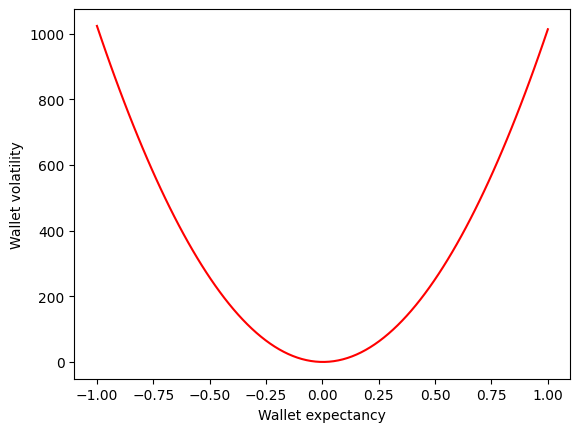

In [12]:
x = np.linspace(-1,1,100)
plt.xlabel("Wallet expectancy")
plt.ylabel("Wallet volatility")
plt.plot(x, markowitz.wallet_volatility(x), color="red")

/media/onedevman/R&D/WaLev/src/test/maths/impl/Markowitz.py:184: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((z1 * volatility) + z2) + z3


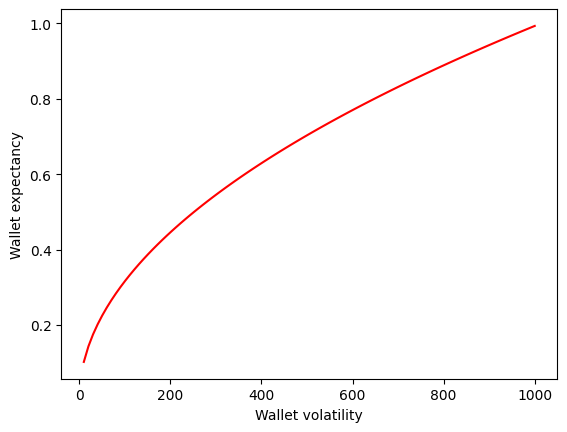

In [13]:
y = np.linspace(0,1000,100)
plt.xlabel("Wallet volatility")
plt.ylabel("Wallet expectancy")
plt.plot(y, markowitz.wallet_expectancy(y), color="red")

In [14]:
markowitz.leverage(1000)

0.9934657537249494
0.0023664366353473073
0.003883637504059506
0.9895821162208899
-0.0015172008687121988


np.float64(-652.2419915702052)

[       nan 0.10199655 0.14327623 0.17494324 0.20163707 0.22515352
 0.24641327 0.26596316 0.28415944 0.30124953 0.31741357 0.33278755
 0.34747709 0.3615662  0.37512301 0.38820363 0.40085498 0.41311674
 0.42502282 0.43660249 0.44788121 0.45888129 0.46962241 0.48012205
 0.49039579 0.50045763 0.51032014 0.51999474 0.52949176 0.53882064
 0.54799001 0.55700779 0.56588124 0.57461708 0.58322154 0.59170035
 0.60005887 0.60830208 0.61643462 0.62446084 0.63238479 0.6402103
 0.64794093 0.65558007 0.66313088 0.67059635 0.67797933 0.68528248
 0.69250834 0.69965931 0.70673767 0.7137456  0.72068515 0.72755828
 0.73436687 0.7411127  0.74779748 0.75442284 0.76099032 0.76750143
 0.77395759 0.78036016 0.78671046 0.79300976 0.79925925 0.80546011
 0.81161344 0.81772034 0.82378182 0.8297989  0.83577253 0.84170363
 0.84759312 0.85344184 0.85925064 0.86502032 0.87075167 0.87644542
 0.88210232 0.88772308 0.89330837 0.89885886 0.90437519 0.90985798
 0.91530785 0.92072537 0.92611111 0.93146563 0.93678946 0.94208

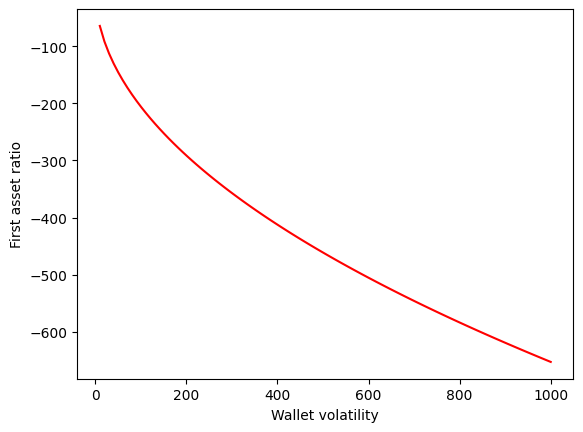

In [19]:
y = np.linspace(0,1000,100)
plt.xlabel("Wallet volatility")
plt.ylabel("First asset ratio")
plt.plot(y, markowitz.leverage(y), color="red")

In [20]:
assets[0].yields()

array([-0.11734552,  0.01430127,  0.01785714, ...,  0.01870087,
       -0.04829716,  0.0320871 ])